# Notebook for image generation

In [1]:
import moire_functions as moire
import numpy as np
import drawSvg as draw
from myst_nb import glue

## Atom lattice

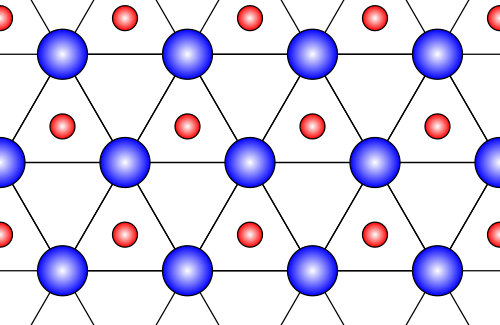

In [27]:
width, height = 4, 2.6
container = draw.Drawing(width, height, origin="center")
W = moire.LatticeAtom([0, 0], atom_radius=0.2)
Se2 = moire.LatticeAtom([1/2, 1/(2*np.sqrt(3))], atom_color='red', atom_radius=0.1)
lattice = moire.Lattice([1, 0], [1/2, np.sqrt(3)/2], width, height)
lattice.add_atom(W)
lattice.add_atom(Se2)
lattice.NN(W, W, [(1, 0), (0, 1), (1, -1), (-1, 0), (0, -1), (-1, 1)])
#lattice.NN(W, Se2, [(0, 0), (-1, 0), (0, -1)])
for atom in lattice.draw_lattice():
    container.append(atom)
container.setRenderSize(500)
glue("fig:lattice", container)

## Orbitals

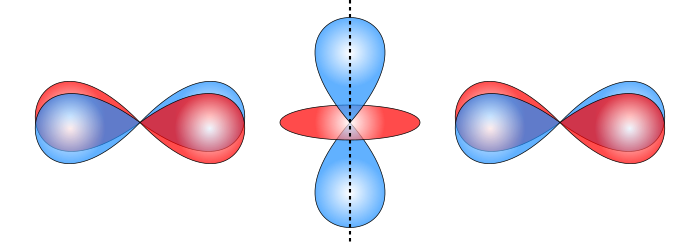

In [26]:
container = draw.Drawing(10, 3.5, origin="center")
orb = moire.Orbital()
#container.append(orb.lobe('blue'))
moire.d_z2(container)
moire.d_xy(container, translate=(3, 0))
moire.d_xy(container, translate=(-3, 0))
container.append(draw.Line(0, -2, 0, 2, stroke='black', stroke_width=stroke_width, stroke_dasharray="0.05,0.05"))
container.setRenderSize(700)
glue('fig:d_z2-d_xy', container)

### Rotating orbitals

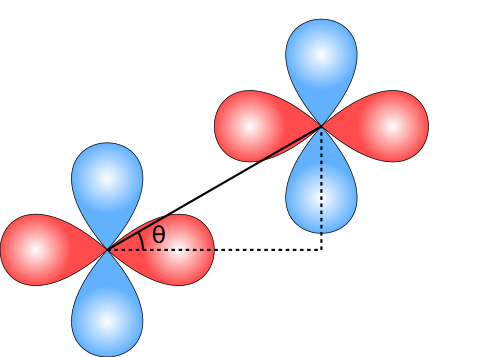

In [24]:
pos_1 = (1.5, 1.5)
pos_2 = (4.5, 1.5+np.sqrt(3))
R = 0.5
stroke_width = 0.03
color = 'black'
container = draw.Drawing(7, 5)
moire.d_x2y2(container, translate=(pos_1[0], -pos_1[1]))
moire.d_x2y2(container, translate=(pos_2[0], -pos_2[1]))
container.append(draw.Line(*pos_1, *pos_2, stroke=color, stroke_width=stroke_width))
container.append(draw.Line(*pos_1, pos_2[0], pos_1[1], stroke=color, stroke_width=stroke_width, stroke_dasharray="0.05,0.05"))
container.append(draw.Line(pos_2[0], pos_1[1], *pos_2, stroke=color, stroke_width=stroke_width, stroke_dasharray="0.05,0.05"))
container.append(draw.Arc(*pos_1, R, 30, 0, cw=True, stroke=color, stroke_width=stroke_width, fill='none'))
container.append(draw.Text('θ', R*2/3, pos_1[0]+1.5*R*np.cos(np.pi/12), pos_1[1]+1.5*R*np.sin(np.pi/12), center=0.6, fill=color))
container.setRenderSize(500)
glue('fig:rotate_orbital', container)

## Constants

In [5]:
var_dic = moire.WSe2.var_dic
for var_key in var_dic:
    glue("var:"+var_key, var_dic[var_key], display=False)